# Entrenamiento del modelo utilizando 15 features

### Preparación de Datos

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

In [2]:
data = pd.read_csv('data/data.csv')
data = data.drop(['id'], axis=1)
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [3]:
x = StandardScaler().fit_transform(x)

#Selección de componentes principales
x_transformed = PCA(n_components=2, random_state=40).fit_transform(x)

#Dividir el conjunto de datos
x_train, x_valid, y_train, y_valid = train_test_split(x_transformed,y,test_size = 0.2 ,stratify=y, random_state= 1 )

## Random Forest Classifier

In [7]:
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

gridSearch= GridSearchCV(RandomForestClassifier(), cv =6, n_jobs=-1, param_grid=param_grid)
gridSearch.fit(x_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial params: ', gridSearch.best_params_)

Initial score:  0.9341520467836258
Initial params:  {'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [11]:
param_grid = {
    'max_depth': list(range(12,25)),
    'min_samples_split': list(range(8,20)),
    'min_impurity_decrease': [0.001, 0.005, 0.0001],
}

gridSearch= GridSearchCV(RandomForestClassifier(), cv =6, n_jobs=-1, param_grid=param_grid)
gridSearch.fit(x_train, y_train)
print('Best score: ', gridSearch.best_score_)
print('Best params: ', gridSearch.best_params_)

Best score:  0.9407602339181285
Best params:  {'max_depth': 20, 'min_impurity_decrease': 0.0001, 'min_samples_split': 11}


Accuracy Score: 96.49
Recall Score: 92.86
F1 Score: 95.12


<Axes: >

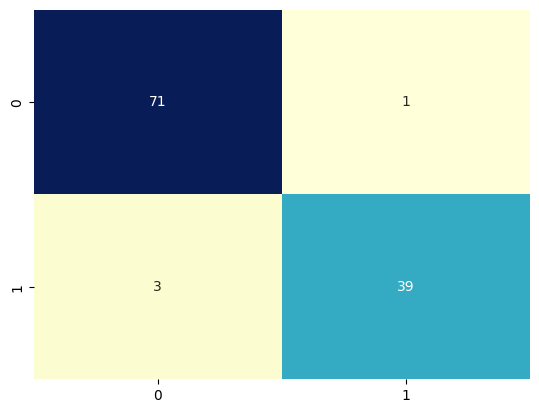

In [14]:

classifier = gridSearch.best_estimator_
predictions = classifier.fit(x_train, y_train).predict(x_valid)

cm_pca_2 = confusion_matrix(y_valid, predictions)
print(f'Accuracy Score: {accuracy_score(y_valid, predictions)*100:.2f}')
print(f'Recall Score: {recall_score(y_valid, predictions)*100:.2f}')
print(f'F1 Score: {f1_score(y_valid, predictions)*100:.2f}')
sns.heatmap(cm_pca_2,annot=True, fmt='d', cmap='YlGnBu', cbar=False,)


## Red Neuronal con Keras

In [7]:
import tensorflow as tf

2024-01-29 20:14:07.950895: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
mlp_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
mlp_model_1.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0036),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
mlp_model_1.fit(x_train,y_train, epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7968 - accuracy: 0.6681
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.7538
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.7780
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.8022
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.8132
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8352
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8505
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8637
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8681
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8791
Epoch 11/

4/4 [==============================] - 0s 1ms/step
Accuracy Score with PCA: 95.61
Recall score: 90.48
F1 score: 93.83


<Axes: >

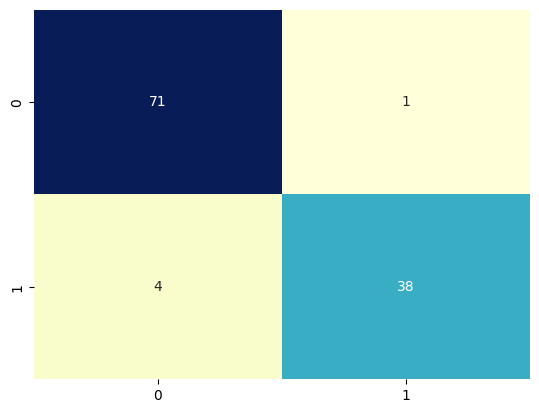

In [9]:
predictions = mlp_model_1.predict(x_valid).round()

print(f'Accuracy Score with PCA: {accuracy_score(y_valid, predictions)*100:.2f}')
print(f'Recall score: {recall_score(y_valid, predictions)*100:.2f}')
print(f'F1 score: {f1_score(y_valid, predictions)*100:.2f}')

cm_pca = confusion_matrix(y_valid, predictions)
sns.heatmap(cm_pca,annot=True, fmt='d', cmap='YlGnBu', cbar=False,)

In [23]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
mlp_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0032),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
mlp_model.fit(x_train,y_train, epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 1ms/step - loss: 0.6974 - accuracy: 0.4132
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5692
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.6286
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6527
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.6637
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.6637
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.6945
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.7253
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.7824
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.8000
Epoch 11/

4/4 [==============================] - 0s 1ms/step
Accuracy Score with PCA: 96.49
Recall score: 92.86
F1 score: 95.12


<Axes: >

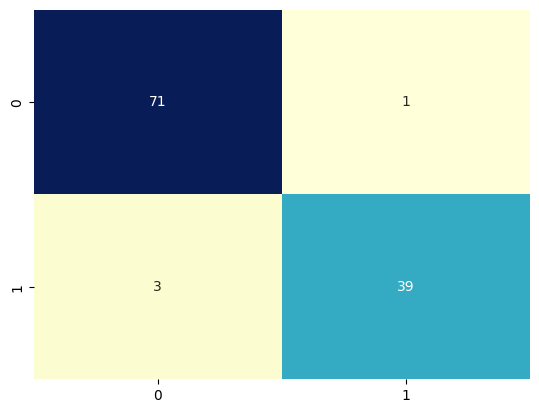

In [24]:
predictions = mlp_model.predict(x_valid).round()

print(f'Accuracy Score with PCA: {accuracy_score(y_valid, predictions)*100:.2f}')
print(f'Recall score: {recall_score(y_valid, predictions)*100:.2f}')
print(f'F1 score: {f1_score(y_valid, predictions)*100:.2f}')

cm_pca = confusion_matrix(y_valid, predictions)
sns.heatmap(cm_pca,annot=True, fmt='d', cmap='YlGnBu', cbar=False,)